In [18]:
import numpy as npp
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from SimplePolicyNetwork import SimplePolicyNetwork
from SimpleRLPolicyGradientSolver import SimpleRLPolicyGradientSolver
from simpleBox import simpleBox
from SimRat import SimRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


VirtualRat0
Episode 50 complete (0.21s), loss: 1642.1431803, reward: -12, running reward: -2.25826557886
Episode 100 complete (0.18s), loss: 1311.13032432, reward: 16, running reward: 6.41202769335
Episode 150 complete (0.23s), loss: 623.859156473, reward: 40, running reward: 23.8505603198
Episode 200 complete (0.26s), loss: 277.971602002, reward: 42, running reward: 37.7455418635
Episode 250 complete (0.33s), loss: 96.3678945765, reward: 46, running reward: 45.8411687061
Episode 300 complete (0.33s), loss: 60.1529190848, reward: 50, running reward: 48.8042374344


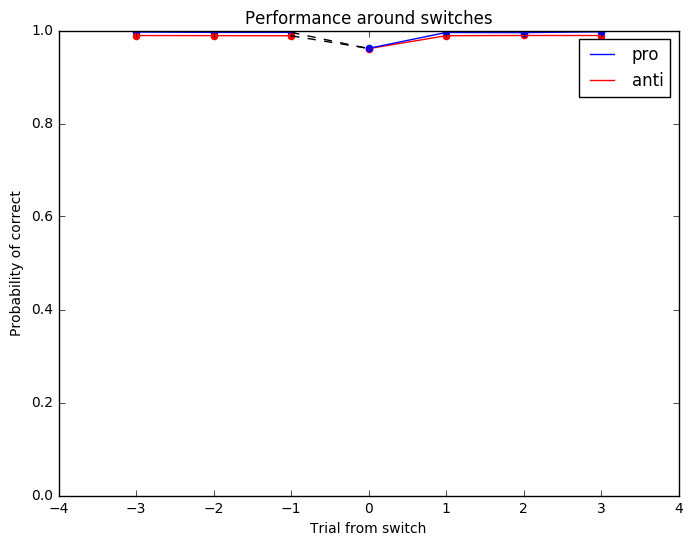

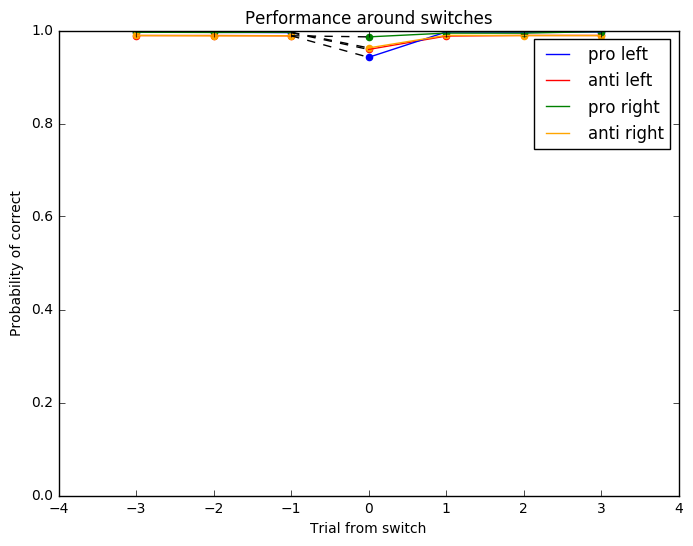

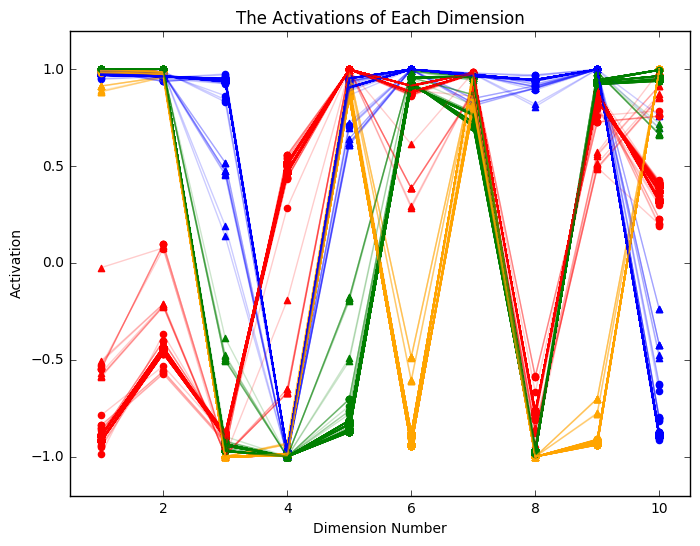

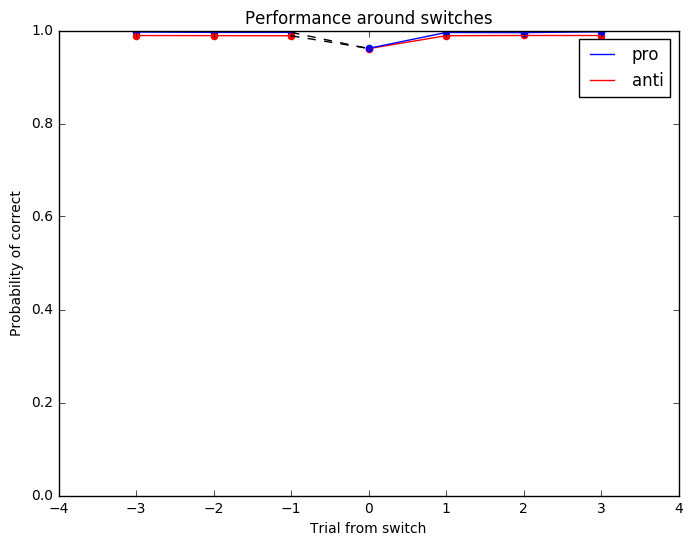

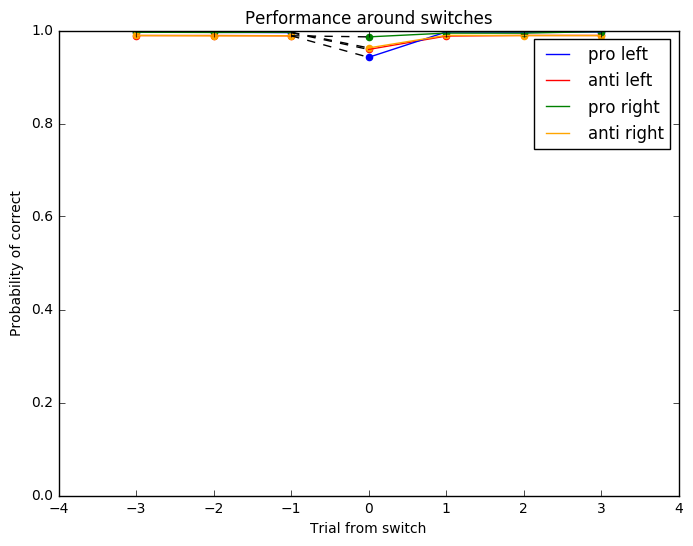

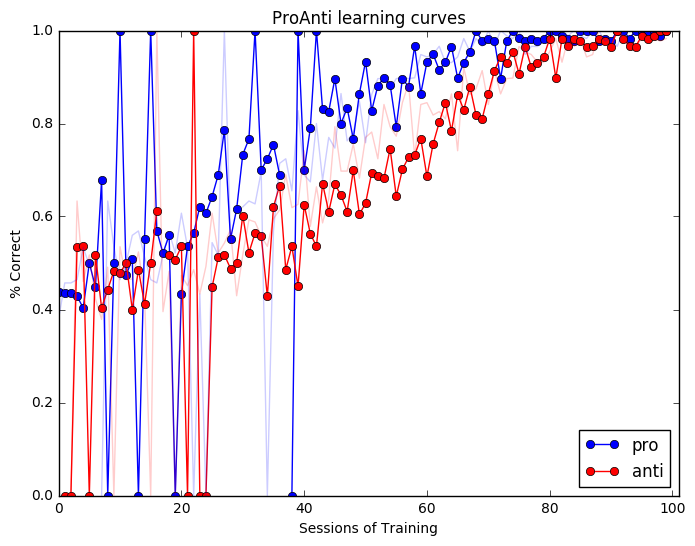

NameError: name 'all_solvers' is not defined

In [20]:
box = simpleBox(mode="alternative",length=1000,block_size=30,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
loaded_params = load_weights("good_weights/good_weights1.pkl")
solvers = {}
rats = {}
for j in range(1):
    ratname = 'VirtualRat'+str(j)
    print ratname
    model = SimplePolicyNetwork(hidden_dim=10,reg=0.5, noise_factor = 0)
    rat = SimRat(model)
    box = simpleBox(mode="alternative",length=10000,block_size=30,random_range=0,
                    trial_per_episode=50, repeat = True, reward_ratio = 1, p2a = 0.5, correction = True)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 1e-2,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=301,
                                        verbose=False,
                                        supervised = True,
                                        stop = False,
                                        print_every=50)

    solver.init()
    solver.load_params(loaded_params)
    solver.set_temperature(5.0)
    solver.train()

    rats[ratname] = rat

    probs = rat.predict(val_X,val_y)
    trial_window = 3

    draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)
    draw_3d_new(rat.p2a_left_prob, rat.p2a_right_prob, rat.a2p_left_prob, rat.a2p_right_prob, trial_window = 3)

    solvers[ratname] = solver
    rat.addHistory(box.output_history())
    rat.computeLearningCurve()
    
    parallel_coordinate(model.activation_history.asnumpy(), start = 0, end = 1000)

trial_window = 3
p2a_mean, a2p_mean, p2a_left_mean, a2p_left_mean, p2a_right_mean, a2p_right_mean = meanPerformance(rats, trial_window = 3)
draw_3d(p2a_mean, a2p_mean, trial_window = 3)
draw_3d_new(rat.p2a_left_prob, rat.p2a_right_prob, rat.a2p_left_prob, rat.a2p_right_prob, trial_window = 3)
#pro_mean, anti_mean = meanLearningCurve(rats)
learningCurve(pro_mean,anti_mean, rats)
all_solvers.append(solvers)
all_rats.append(rats)

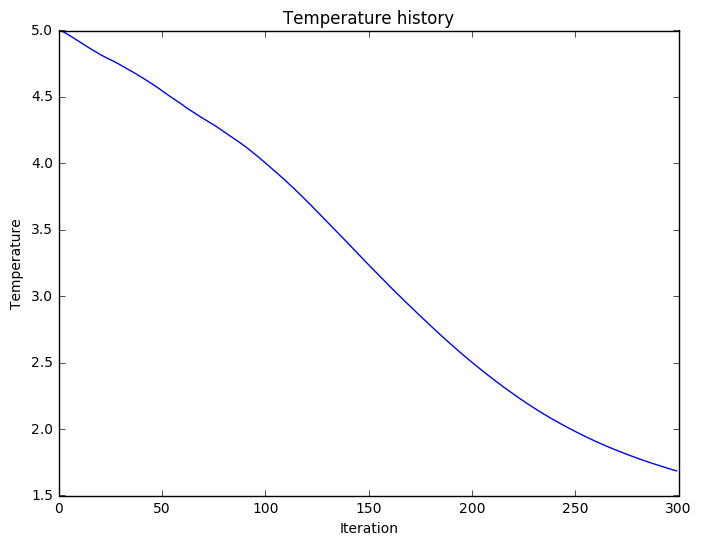

In [21]:
plt.plot(solver.temperature_history)
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title('Temperature history')
plt.show()

In [23]:
for k, v in solver.parameter_history.iteritems():
    print k
    print v[-1]

b
[-0.63  1.29 -1.12 -1.12  1.16  1.31  0.86 -0.45 -0.28 -0.31]
temperature
1.68074738775
Wa
[[ 0.99 -0.72 -0.43]
 [ 1.25 -1.02 -1.15]
 [ 0.23 -1.9   0.1 ]
 [-1.82  0.01  1.69]
 [ 1.26  0.05 -1.17]
 [-1.23  2.75 -1.56]
 [ 0.37 -0.2  -1.53]
 [ 1.85 -1.39  1.74]
 [-1.41  1.84 -1.27]
 [-0.43  1.87 -2.15]]
Wh
[[ -4.82e-01  -1.46e-01  -3.65e-01  -3.34e-01   2.58e-01  -4.50e-01
   -1.22e-01  -8.88e-01  -4.31e-01  -1.62e-01]
 [  1.09e+00  -2.13e-01  -2.52e-01  -3.72e-01   1.66e-01   2.52e-01
    1.58e-01   1.33e-01   6.87e-01   4.93e-01]
 [ -2.29e-02   5.07e-01   7.64e-01  -4.08e-01   4.18e-01   2.25e-01
   -3.20e-02   5.95e-02  -2.48e-02   3.29e-01]
 [ -4.58e-01  -4.89e-01   3.94e-01  -2.74e-01   5.59e-01  -2.51e-02
   -1.64e-01  -6.48e-01   2.74e-01  -7.80e-02]
 [  4.69e-01  -4.20e-03  -9.56e-02   1.82e-01   3.98e-01   2.88e-01
    5.86e-01  -2.21e-01   2.19e-01  -2.54e-01]
 [  2.81e-04  -6.64e-02   5.12e-01  -7.63e-02   1.98e-01  -6.59e-01
   -2.98e-01   3.59e-01  -3.55e-01  -5.86e-01]
 [ 

In [ ]:
param = params2vector(solver.parameter_history,0)
num_parameter = param.shape[0]
all_parameters = np.zeros((0,10,num_parameter+1))
for vindex in range(len(all_solvers)):
    v = all_solvers[vindex]
    rats = all_rats[vindex]
    parameters = np.zeros((0,num_parameter+1))
    for kk, vv in v.iteritems():
        smallest = np.argmin(np.array([rats[kk].p2a_left_prob[3],rats[kk].p2a_right_prob[3],
                  rats[kk].a2p_left_prob[3],rats[kk].a2p_right_prob[3]]))
        params = params2vector(vv.parameter_history,-1)#index
        params = np.append(params,smallest)
        params_exp = np.expand_dims(params,axis=0)
        parameters = np.append(parameters,params_exp,axis=0)
    parameters_exp = np.expand_dims(parameters,axis=0)
    all_parameters = np.append(all_parameters,parameters_exp, axis=0)

In [ ]:
save_weights("final_parameter_fixed_init_with_output.pkl",all_parameters)